In [26]:
#JIA MA START

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')

__From Fire table, let's take a look at all the columns. The database contains multiple tables. In our project, we only extract Fire table. (Laura add)__

In [4]:
df = pd.read_sql_query("SELECT * FROM 'Fires'", conn)
print(df.head())

   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  \
0                  0511     Plumas National Forest   
1                  0503   

__Remove rows with empty data points (Laura added)__

In [5]:
df = df.dropna()

In [6]:
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_SIZE FROM 'Fires'", conn)
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

  DISCOVERY_TIME  FIRE_SIZE  
0           1300       0.10  
1           0845       0.25  
2           1921       0.10  
3           1600       0.10  
4           1600       0.10  


In [7]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(df.shape) 

(1880465, 9)


__Convert Fire cause column from categorial data tyle to numerical data type for k-means clustering later (Laura added)__

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_DESCR_TRANS'] = le.fit_transform(df['STAT_CAUSE_DESCR'])

__Display what each number means after above conversion for interpretation. (Laura added)__

In [10]:
for i in df['STAT_CAUSE_DESCR_TRANS'].unique():
    print(str(i)+" is reperesenting "+df[df['STAT_CAUSE_DESCR_TRANS']==i]['STAT_CAUSE_DESCR'].unique())

['7 is reperesenting Miscellaneous']
['6 is reperesenting Lightning']
['3 is reperesenting Debris Burning']
['1 is reperesenting Campfire']
['4 is reperesenting Equipment Use']
['0 is reperesenting Arson']
['2 is reperesenting Children']
['10 is reperesenting Railroad']
['11 is reperesenting Smoking']
['9 is reperesenting Powerline']
['12 is reperesenting Structure']
['5 is reperesenting Fireworks']
['8 is reperesenting Missing/Undefined']


In [11]:
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday_name
df_orig = df.copy() 
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

  DISCOVERY_TIME  FIRE_SIZE       DATE  STAT_CAUSE_DESCR_TRANS  YEAR  MONTH  \
0           1300       0.10 2005-02-02                       7  2005      2   
1           0845       0.25 2004-05-12                       6  2004      5   
2           1921       0.10 2004-05-31                       3  2004      5   
3           1600       0.10 2004-06-28                       6  2004      6   
4           1600       0.10 2004-06-28                       6  2004      6   

  DAY_OF_WEEK  
0   Wednesday  
1   Wednesday  
2      M

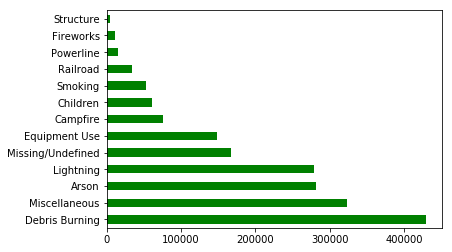

In [12]:
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='green')
plt.show()

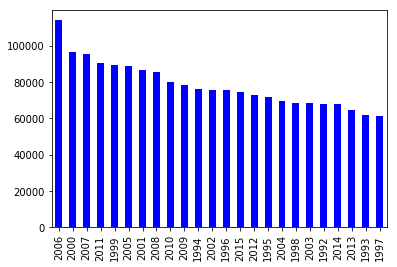

In [13]:
df['YEAR'].value_counts().plot(kind='bar',color='blue')
plt.show()

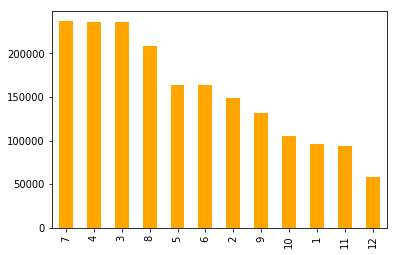

In [14]:
df['MONTH'].value_counts().plot(kind='bar',color='ORANGE')
plt.show()

In [15]:
df['FIRE_SIZE'].describe()

count    1.880465e+06
mean     7.452016e+01
std      2.497598e+03
min      1.000000e-05
25%      1.000000e-01
50%      1.000000e+00
75%      3.300000e+00
max      6.069450e+05
Name: FIRE_SIZE, dtype: float64

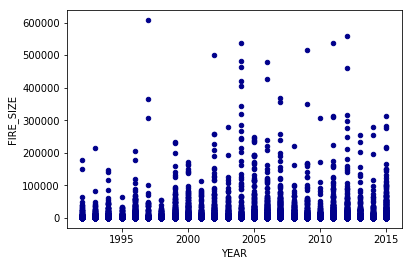

In [16]:
ax1 = df.plot.scatter(x='YEAR',y='FIRE_SIZE',c='DarkBlue')

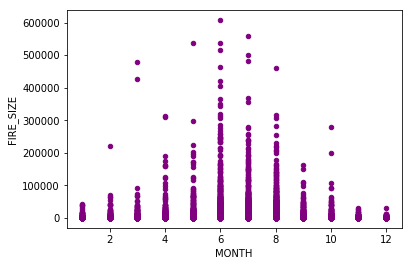

In [17]:
ax2 = df.plot.scatter(x='MONTH',y='FIRE_SIZE',c='PURPLE')

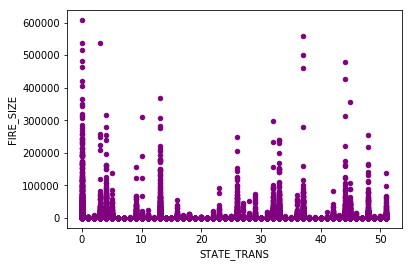

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STATE_TRANS'] = le.fit_transform(df['STATE'])
ax3 = df.plot.scatter(x='STATE_TRANS',y='FIRE_SIZE',c='PURPLE')

In [19]:
for i in df['STATE_TRANS'].unique():
    print(str(i)+" is reperesenting "+df[df['STATE_TRANS']==i]['STATE'].unique())

['4 is reperesenting CA']
['32 is reperesenting NM']
['37 is reperesenting OR']
['27 is reperesenting NC']
['51 is reperesenting WY']
['5 is reperesenting CO']
['48 is reperesenting WA']
['26 is reperesenting MT']
['45 is reperesenting UT']
['3 is reperesenting AZ']
['42 is reperesenting SD']
['2 is reperesenting AR']
['33 is reperesenting NV']
['13 is reperesenting ID']
['23 is reperesenting MN']
['44 is reperesenting TX']
['9 is reperesenting FL']
['41 is reperesenting SC']
['18 is reperesenting LA']
['36 is reperesenting OK']
['16 is reperesenting KS']
['24 is reperesenting MO']
['29 is reperesenting NE']
['22 is reperesenting MI']
['17 is reperesenting KY']
['35 is reperesenting OH']
['15 is reperesenting IN']
['46 is reperesenting VA']
['14 is reperesenting IL']
['43 is reperesenting TN']
['10 is reperesenting GA']
['0 is reperesenting AK']
['28 is reperesenting ND']
['50 is reperesenting WV']
['49 is reperesenting WI']
['1 is reperesenting AL']
['30 is reperesenting NH']
['38 is 

In [20]:
from sklearn.cluster import KMeans

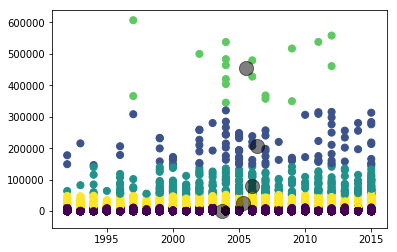

In [21]:
X=df[['YEAR','FIRE_SIZE']].values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [22]:
# JIA MA END

__K means to see the fire size associated with US States. This graph generates 5 clusters (Laura added)__

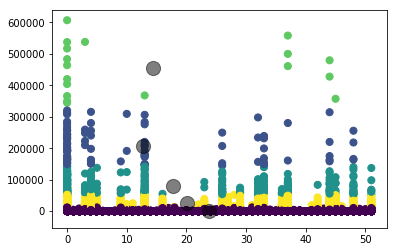

In [23]:
X=df[['STATE_TRANS','FIRE_SIZE']].values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

__This graph generates 3 clusters (Laura added)__

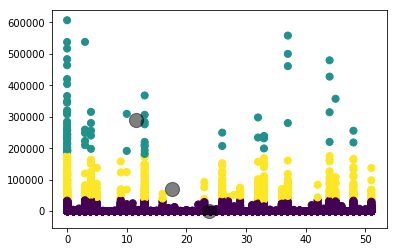

In [24]:
X=df[['STATE_TRANS','FIRE_SIZE']].values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

__K means to see patterns between fire size and cause of the fire. Conclusion is that the #6 cause, which represents Lightening, is associated the largest fire size.(Laura added)__

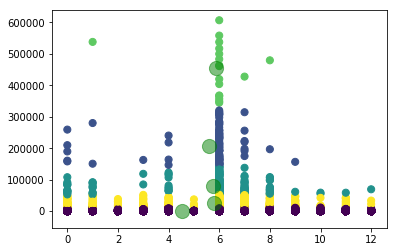

In [27]:
X=df[['STAT_CAUSE_DESCR_TRANS','FIRE_SIZE']].values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5)